# Term Project

## Data Selection and EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import norm

### Reading the sales data

In [2]:
# reading the data
file_path = 'C:/Users/ivan2/gitLocal/DSC680-SUMMER2024/TCGplayer.csv'

df = pd.read_csv(file_path)
df.head(5)


,ReleaseDate,SetID,SetName,SetSize,Common,Uncommon,Rare,Rare1,Rare2,Rare3,...,Rare6,Top10R,Top20-30R,Generation,HigherRarityPullRate,DSR,Date,Condition,QTY,Price
0,3/31/2023,SV01,Scarlet & Violet Base,258,105,60,21,12,20,24,...,0,1,1,12,0.03,428,6/1/2024,Unopened,1,100.00
1,3/31/2023,SV01,Scarlet & Violet Base,258,105,60,21,12,20,24,...,0,1,1,12,0.03,428,6/1/2024,Unopened,1,100.00
2,3/31/2023,SV01,Scarlet & Violet Base,258,105,60,21,12,20,24,...,0,1,1,12,0.03,428,6/1/2024,Unopened,1,100.00
3,3/31/2023,SV01,Scarlet & Violet Base,258,105,60,21,12,20,24,...,0,1,1,12,0.03,428,6/1/2024,Unopened,1,100.00
4,3/31/2023,SV01,Scarlet & Violet Base,258,105,60,21,12,20,24,...,0,1,1,12,0.03,428,6/1/2024,Unopened,2,83.99


In [3]:
df.shape

(8926, 22)

In [4]:
df.dtypes

ReleaseDate              object
SetID                    object
SetName                  object
SetSize                   int64
Common                    int64
Uncommon                  int64
Rare                      int64
Rare1                     int64
Rare2                     int64
Rare3                     int64
Rare4                     int64
Rare5                     int64
Rare6                     int64
Top10R                    int64
Top20-30R                 int64
Generation                int64
HigherRarityPullRate    float64
DSR                       int64
Date                     object
Condition                object
QTY                       int64
Price                   float64
dtype: object

In [5]:
df['Generation'] = df['Generation'].astype('category')

In [6]:
df.dtypes

ReleaseDate               object
SetID                     object
SetName                   object
SetSize                    int64
Common                     int64
Uncommon                   int64
Rare                       int64
Rare1                      int64
Rare2                      int64
Rare3                      int64
Rare4                      int64
Rare5                      int64
Rare6                      int64
Top10R                     int64
Top20-30R                  int64
Generation              category
HigherRarityPullRate     float64
DSR                        int64
Date                      object
Condition                 object
QTY                        int64
Price                    float64
dtype: object

### Conducting initial EDA on the TCG sales data

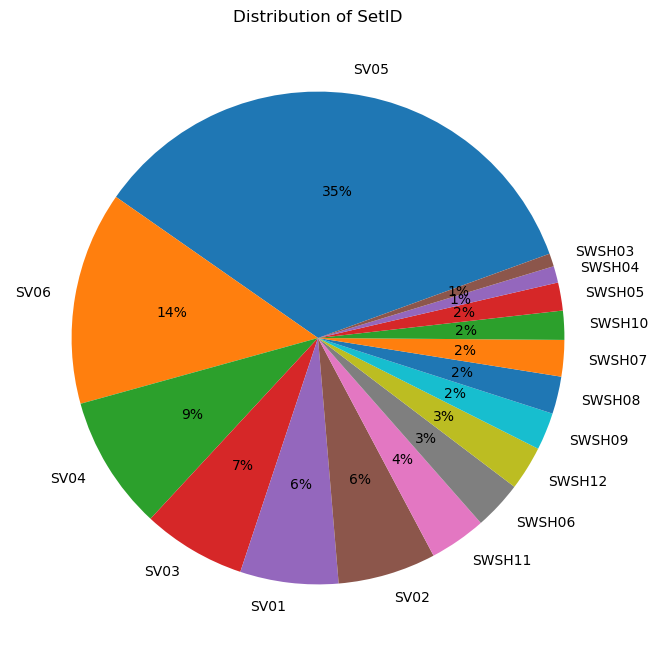

In [7]:
# Visualizing Counts that are in the SetID variable, this is basically the count of sales by SetID
SetID_counts = df['SetID'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(SetID_counts, labels=SetID_counts.index, autopct='%1.0f%%', startangle=20)
plt.title('Distribution of SetID')
plt.show()


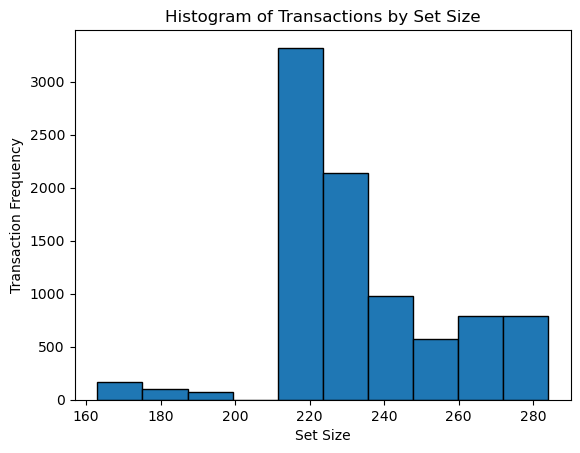

In [8]:
# Histogram of transaction frequency by set size
plt.hist(df['SetSize'], bins=10, edgecolor='black')

# Set the labels and title
plt.xlabel('Set Size')
plt.ylabel('Transaction Frequency')
plt.title('Histogram of Transactions by Set Size')

# Show the plot
plt.show()

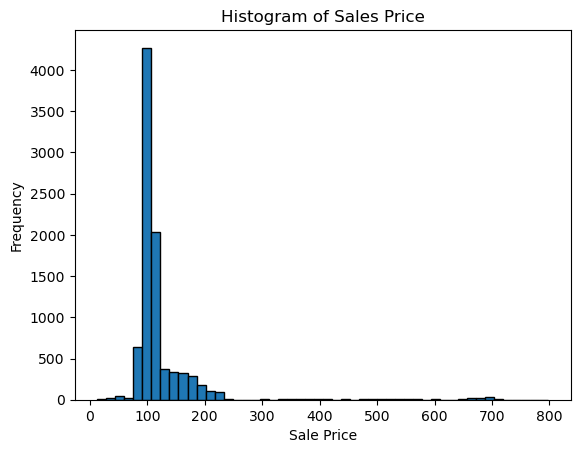

In [9]:
# Histogram of sale price
plt.hist(df['Price'], bins=50, edgecolor='black')

# Set the labels and title
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Histogram of Sales Price')

# Show the plot
plt.show()

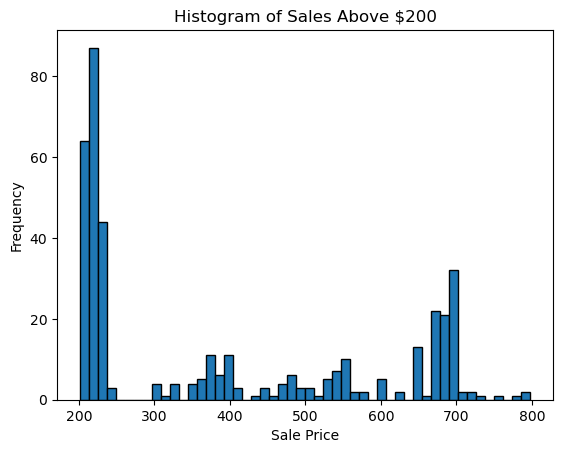

In [10]:
# Filter the DataFrame to include only sale prices above 200
filtered_df = df[df['Price'] > 200]

# Create the histogram
plt.hist(filtered_df['Price'], bins=50, edgecolor='black')

# Set the labels and title
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Histogram of Sales Above $200')

# Show the plot
plt.show()

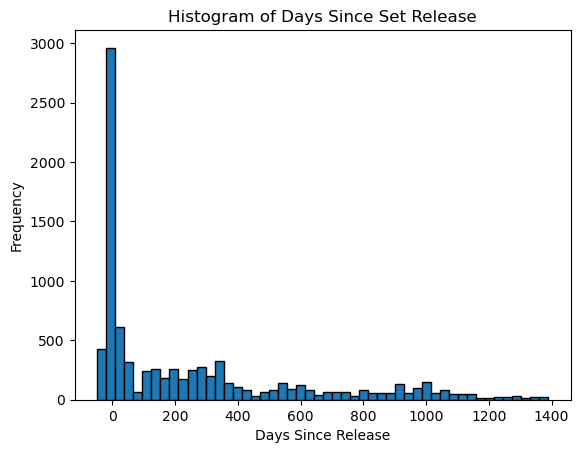

In [11]:
# Histogram of purchase days since set release
plt.hist(df['DSR'], bins=50, edgecolor='black')

# Set the labels and title
plt.xlabel('Days Since Release')
plt.ylabel('Frequency')
plt.title('Histogram of Days Since Set Release')

# Show the plot
plt.show()

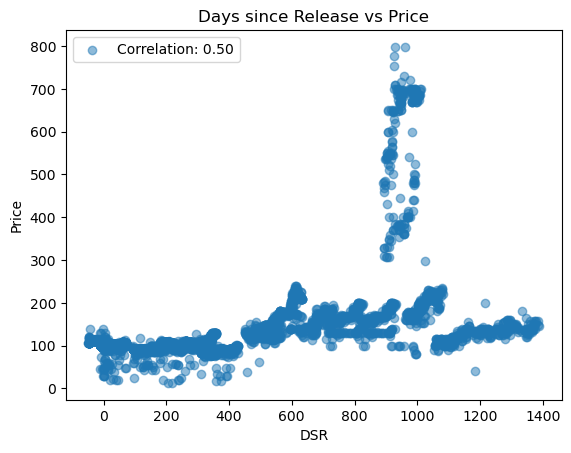

In [12]:
# Calculate Pearson's correlation coefficient
corr_DSR_Price, _ = pearsonr(df['DSR'], df['Price'])

# Create the scatter plot
plt.scatter(df['DSR'], df['Price'], alpha=0.5, label=f'Correlation: {corr_DSR_Price:.2f}')

# Set the labels and title
plt.xlabel('DSR')
plt.ylabel('Price')
plt.title('Days since Release vs Price')
plt.legend()

# Show the plot
plt.show()

In [13]:
# Filtered df excluding the anomoly set SWSH07
filtered_df = df[df['SetID'] != 'SWSH07']

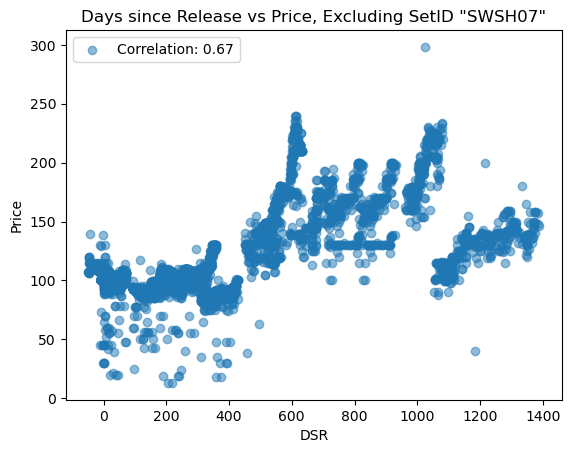

In [14]:
# Calculate Pearson's correlation coefficient
corrfdf_DSR_Price, _ = pearsonr(filtered_df['DSR'], filtered_df['Price'])

# Create the scatter plot
plt.scatter(filtered_df['DSR'], filtered_df['Price'], alpha=0.5, label=f'Correlation: {corrfdf_DSR_Price:.2f}')

# Set the labels and title
plt.xlabel('DSR')
plt.ylabel('Price')
plt.title('Days since Release vs Price, Excluding SetID "SWSH07"')
plt.legend()

# Show the plot
plt.show()

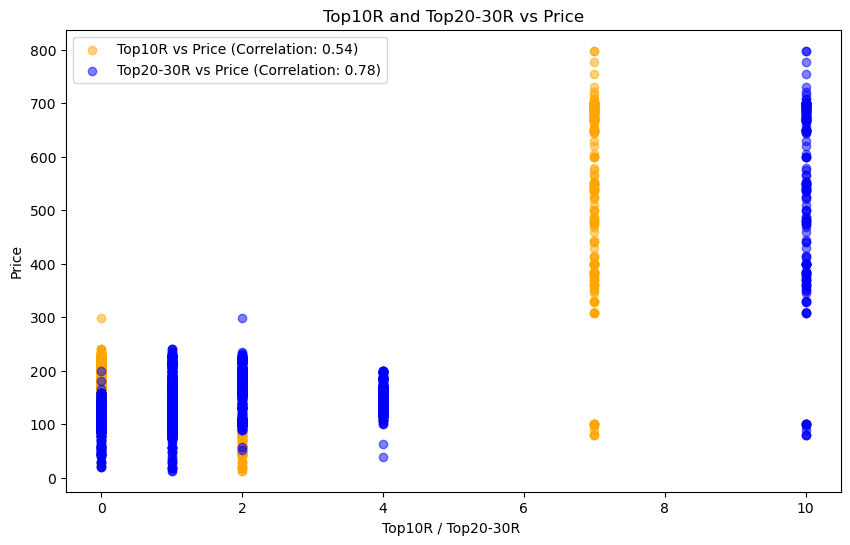

In [15]:
# Calculate Pearson's correlation coefficient
corr_Top10_30R_Price, _ = pearsonr(df['Top20-30R'], df['Price'])
corr_Top10R_Price, _ = pearsonr(df['Top10R'], df['Price'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Top10R'], df['Price'], alpha=0.5, label=f'Top10R vs Price (Correlation: {corr_Top10R_Price:.2f})', color='orange')
plt.scatter(df['Top20-30R'], df['Price'], alpha=0.5, label=f'Top20-30R vs Price (Correlation: {corr_Top10_30R_Price:.2f})', color='blue')

# Set the labels and title
plt.xlabel('Top10R / Top20-30R ')
plt.ylabel('Price')
plt.title('Top10R and Top20-30R vs Price')
plt.legend()

# Show the plot
plt.show()

In [16]:
def show_dist_per_setID(df, colname, title):
    sns.boxplot(data = df, y = colname, x = 'SetID')
    plt.ylabel("Price")
    plt.xlabel("SetID")
    plt.title(f"{title} Price Distribution per SetID")
    plt.xticks(rotation=25)  # rotating labels
    plt.show()
    
    print()
    print(df.groupby(['SetID'])[colname].describe())

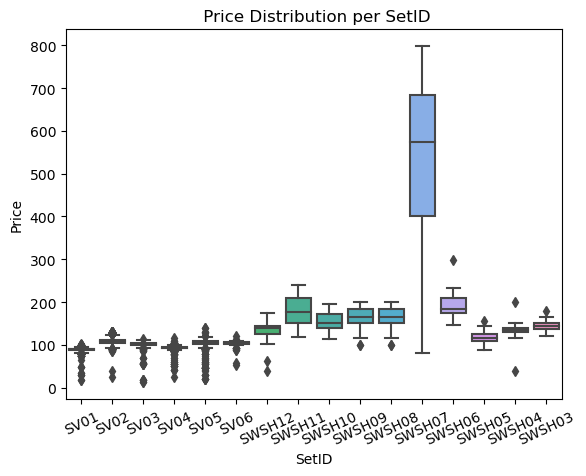


         count        mean         std     min       25%      50%       75%  \
SetID                                                                         
SV01     575.0   88.048748    8.626542   18.00   87.4000   89.920   91.0900   
SV02     574.0  108.383902   10.598274   23.98  104.5000  107.950  112.5475   
SV03     606.0  101.202838   10.371225   12.99   99.9900  102.990  104.9975   
SV04     786.0   92.760165    7.789036   24.95   91.9900   92.590   95.4525   
SV05    3101.0  105.170116    7.782268   19.49  102.7300  105.190  109.3900   
SV06    1250.0  104.006808    3.340581   52.00  102.8300  104.000  105.7275   
SWSH03    76.0  144.456974   10.866688  120.00  136.9000  144.430  150.0000   
SWSH04    97.0  133.220309   13.599123   39.99  129.0000  135.000  138.9900   
SWSH05   164.0  117.168598   12.898857   88.01  108.7150  114.990  124.9900   
SWSH06   285.0  191.320351   21.929796  145.99  174.7700  185.000  209.4100   
SWSH07   213.0  540.738028  169.696556   79.99  400

In [17]:
show_dist_per_setID(df, 'Price', "")

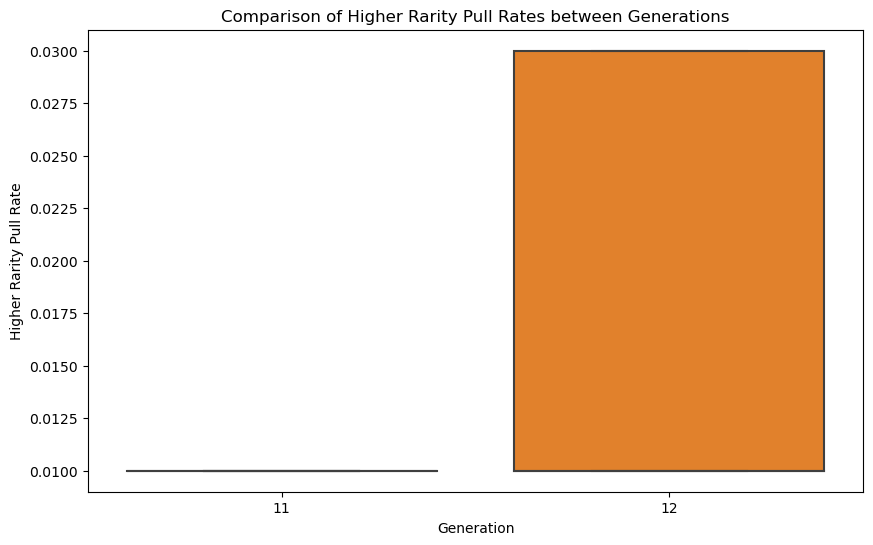

In [18]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Generation', y='HigherRarityPullRate', data=df)

# Plot settings
plt.xlabel('Generation')
plt.ylabel('Higher Rarity Pull Rate')
plt.title('Comparison of Higher Rarity Pull Rates between Generations')
plt.show()

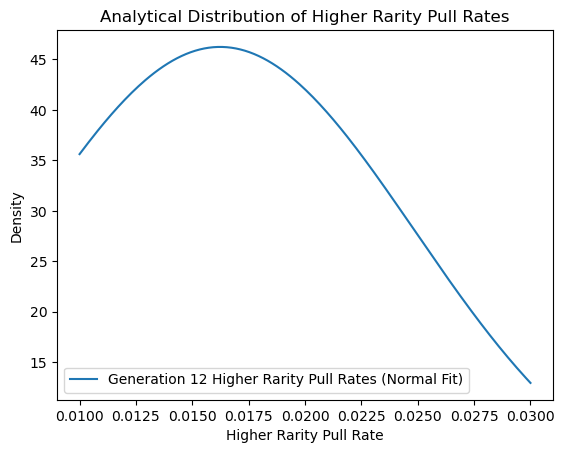

In [19]:
# Filter the Higher Rarity Pull Rates for Generations 12 only (due to near-zero Std Dev for Gen 11)
gen12 = df[df['Generation'] == 12]['HigherRarityPullRate'].dropna()

# Estimate the mean and standard deviation parameters
gen12_mean, gen12_std = gen12.mean(), gen12.std()

# Generate a range of values used for plotting the PDF
min_rate, max_rate = gen12.min(), gen12.max()
xs = np.linspace(min_rate, max_rate, 200)

# Generate the PDF for Generation 12
gen12_pdf = norm.pdf(xs, gen12_mean, gen12_std)

# Plot the PDFs
plt.plot(xs, gen12_pdf, label='Generation 12 Higher Rarity Pull Rates (Normal Fit)')

# Plot settings
plt.xlabel('Higher Rarity Pull Rate')
plt.ylabel('Density')
plt.title('Analytical Distribution of Higher Rarity Pull Rates')
plt.legend()

# Show the plot
plt.show()

## Data Preparation

### Data Preperation / Processing

In [20]:
# Data Cleaning
# Convert date columns to datetime format
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

ReleaseDate             0
SetID                   0
SetName                 0
SetSize                 0
Common                  0
Uncommon                0
Rare                    0
Rare1                   0
Rare2                   0
Rare3                   0
Rare4                   0
Rare5                   0
Rare6                   0
Top10R                  0
Top20-30R               0
Generation              0
HigherRarityPullRate    0
DSR                     0
Date                    0
Condition               0
QTY                     0
Price                   0
dtype: int64

In [22]:
# dropping variables with no predictive value
df = df.drop(['ReleaseDate','SetName','Condition','QTY'], axis=1)


In [23]:
df.head(5)

,SetID,SetSize,Common,Uncommon,Rare,Rare1,Rare2,Rare3,Rare4,Rare5,Rare6,Top10R,Top20-30R,Generation,HigherRarityPullRate,DSR,Date,Price
0,SV01,258,105,60,21,12,20,24,10,6,0,1,1,12,0.03,428,2024-06-01,100.00
1,SV01,258,105,60,21,12,20,24,10,6,0,1,1,12,0.03,428,2024-06-01,100.00
2,SV01,258,105,60,21,12,20,24,10,6,0,1,1,12,0.03,428,2024-06-01,100.00
3,SV01,258,105,60,21,12,20,24,10,6,0,1,1,12,0.03,428,2024-06-01,100.00
4,SV01,258,105,60,21,12,20,24,10,6,0,1,1,12,0.03,428,2024-06-01,83.99


In [24]:

# Convert the 'Date' column to datetime if not already done
df['Date'] = pd.to_datetime(df['Date'])

In [25]:
# Set 'Date' as the index
df.set_index('Date', inplace=True)

In [26]:
# Static columns
static_cols = ['SetID', 'SetSize', 'Common', 'Uncommon', 
               'Rare', 'Rare1', 'Rare2', 'Rare3', 'Rare4', 'Rare5', 'Rare6', 
               'Top10R', 'Top20-30R', 'Generation', 'HigherRarityPullRate']

In [27]:
# Dynamic columns to be averaged
dynamic_cols = ['Price', 'DSR']

In [28]:
# Resample the dynamic columns to weekly averages by SetID
weekly_dynamic = df.groupby(['SetID', pd.Grouper(freq='W')])[dynamic_cols].mean().reset_index()

# For static columns, take the first occurrence within each week by SetID
# Drop SetID temporarily to avoid duplication issues
weekly_static = df[static_cols].groupby(['SetID', pd.Grouper(freq='W')]).first().reset_index()

# Merge the data, ensuring no duplication
weekly_df = pd.merge(weekly_dynamic, weekly_static, on=['SetID', 'Date'], suffixes=('', '_drop'))

# Drop the duplicate columns created by suffixes
weekly_df = weekly_df.loc[:, ~weekly_df.columns.str.endswith('_drop')]

In [29]:
weekly_df.head(10)

,SetID,Date,Price,DSR,SetSize,Common,Uncommon,Rare,Rare1,Rare2,Rare3,Rare4,Rare5,Rare6,Top10R,Top20-30R,Generation,HigherRarityPullRate
0,SV01,2024-02-04,86.918462,310.000000,258,105,60,21,12,20,24,10,6,0,1,1,12,0.03
1,SV01,2024-02-11,84.934062,314.000000,258,105,60,21,12,20,24,10,6,0,1,1,12,0.03
2,SV01,2024-02-18,87.916829,321.000000,258,105,60,21,12,20,24,10,6,0,1,1,12,0.03
3,SV01,2024-02-25,87.574865,328.486486,258,105,60,21,12,20,24,10,6,0,1,1,12,0.03
4,SV01,2024-03-03,86.714314,335.176471,258,105,60,21,12,20,24,10,6,0,1,1,12,0.03
5,SV01,2024-03-10,85.761250,342.656250,258,105,60,21,12,20,24,10,6,0,1,1,12,0.03
6,SV01,2024-03-17,87.483846,349.102564,258,105,60,21,12,20,24,10,6,0,1,1,12,0.03
7,SV01,2024-03-24,87.649111,356.577778,258,105,60,21,12,20,24,10,6,0,1,1,12,0.03
8,SV01,2024-03-31,84.323000,363.166667,258,105,60,21,12,20,24,10,6,0,1,1,12,0.03
9,SV01,2024-04-07,85.815667,369.866667,258,105,60,21,12,20,24,10,6,0,1,1,12,0.03


In [30]:
weekly_dynamic

,SetID,Date,Price,DSR
0,SV01,2024-02-04,86.918462,310.000000
1,SV01,2024-02-11,84.934062,314.000000
2,SV01,2024-02-18,87.916829,321.000000
3,SV01,2024-02-25,87.574865,328.486486
4,SV01,2024-03-03,86.714314,335.176471
...,...,...,...,...
268,SWSH12,2024-05-12,143.724211,544.000000
269,SWSH12,2024-05-19,153.535769,552.307692
270,SWSH12,2024-05-26,149.398333,558.666667
271,SWSH12,2024-06-02,157.425000,566.750000


# Modeling Phase - ARIMA

### Initial Steps

**Split into Training and Test Sets**

In [31]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [32]:
# Data Splitting
# Split the data into training and test sets
# Not using this method since it doesnt ensure sufficient data.
#train_df, test_df = train_test_split(weekly_df, test_size=0.1, random_state=42, shuffle=False)

In [33]:
# Function to manually split data into training and test sets ensuring sufficient data
def custom_train_test_split(data, test_size=0.2, min_train_size=10):
    train_data = []
    test_data = []
    
    for set_id in data['SetID'].unique():
        set_data = data[data['SetID'] == set_id]
        n = len(set_data)
        if n < min_train_size + int(test_size * n):
            # Use all data for training if not enough data for test set
            train_data.append(set_data)
        else:
            train_index = int(n * (1 - test_size))
            train_data.append(set_data.iloc[:train_index])
            test_data.append(set_data.iloc[train_index:])
    
    train_df = pd.concat(train_data)
    test_df = pd.concat(test_data) if test_data else pd.DataFrame(columns=data.columns)
    
    return train_df, test_df

In [34]:
# Use custom split method
train_df, test_df = custom_train_test_split(weekly_df, test_size=0.2, min_train_size=10)


In [35]:
# Function to plot the training data, test data, and forecasts for each SetID
def plot_forecasts(set_id, train_data, test_data, forecast_data, forecast_dates):
    plt.figure(figsize=(14, 7))
    plt.plot(train_data.index, train_data, label='Training Data')
    if not test_data.empty:
        plt.plot(test_data.index, test_data, label='Actual Test Data', color='orange')
    plt.plot(forecast_dates, forecast_data, label='Forecasted Data', linestyle='--', color='green')
    plt.title(f'Train and Test Data with Forecasts for SetID {set_id}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

In [36]:
# Function to calculate performance metrics
def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

In [37]:
# Initialize lists to store performance metrics
metrics_list = []

C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


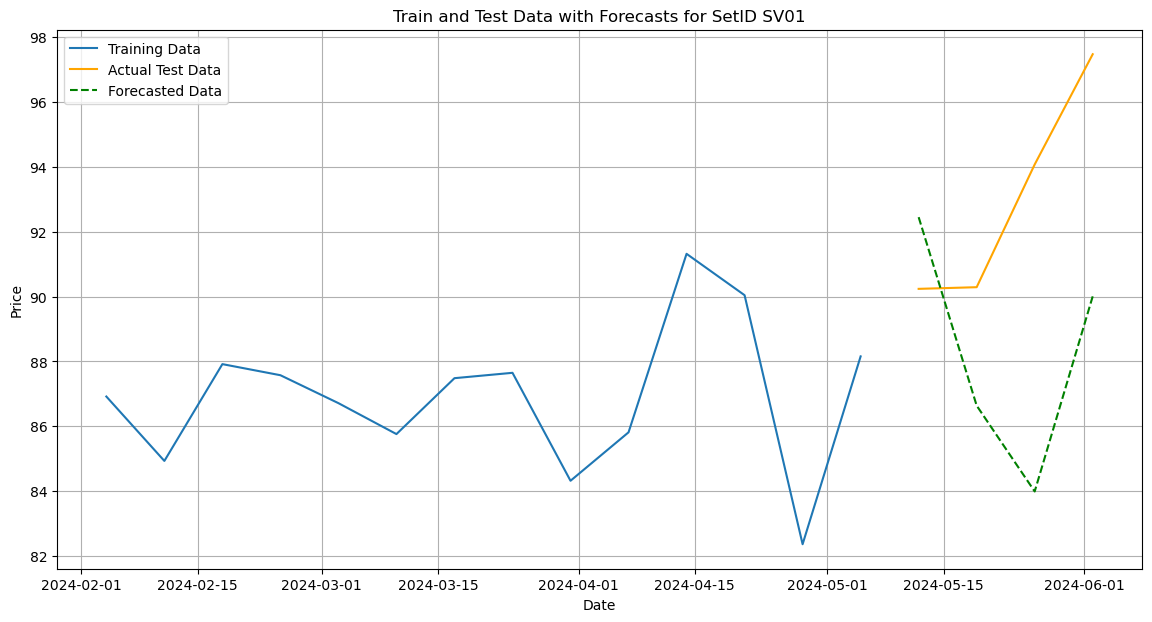

C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


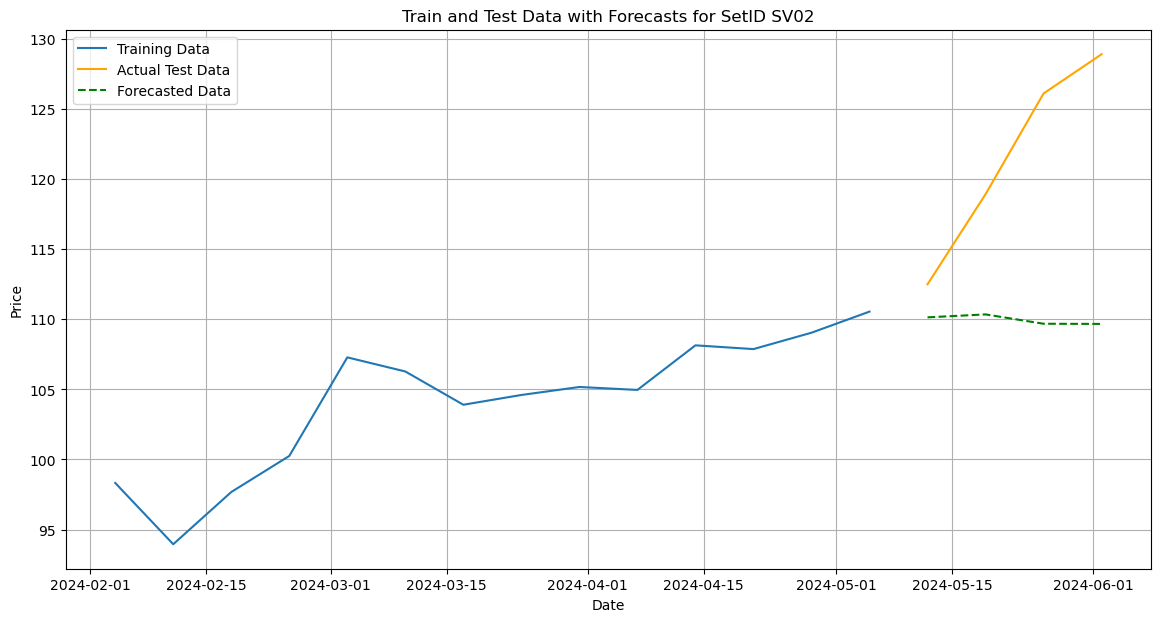

C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


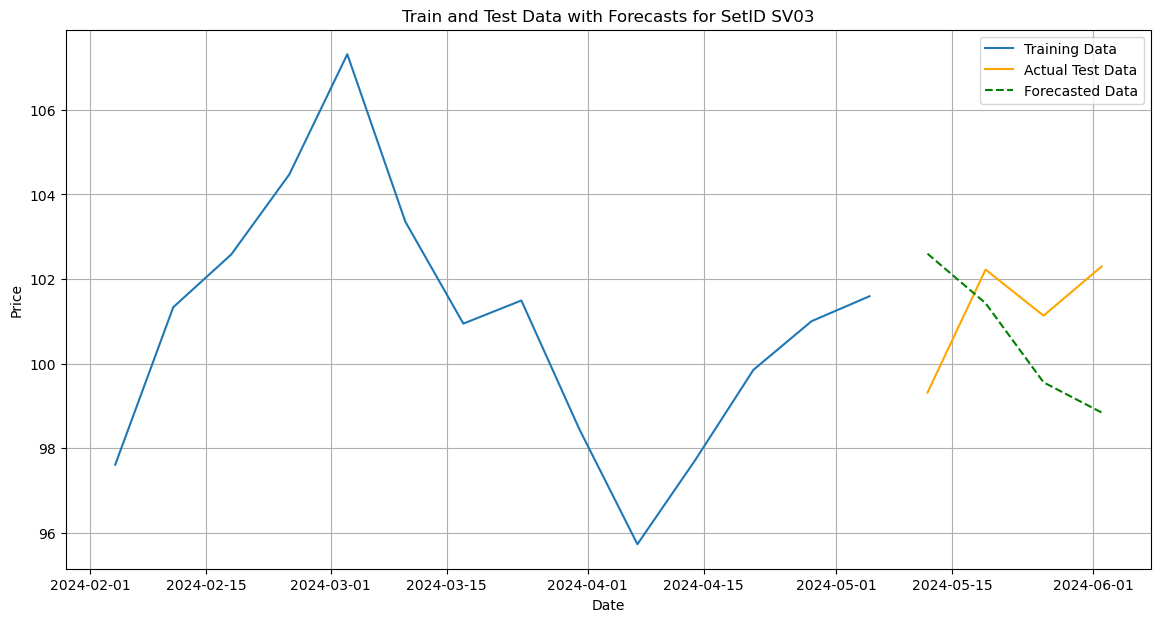

C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


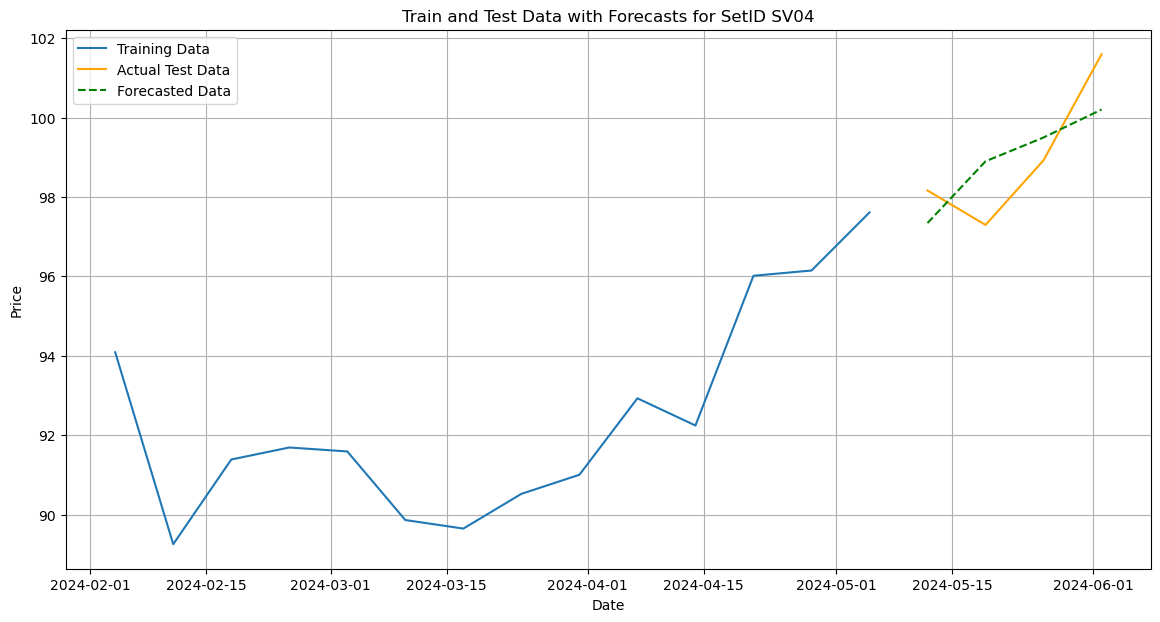

C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


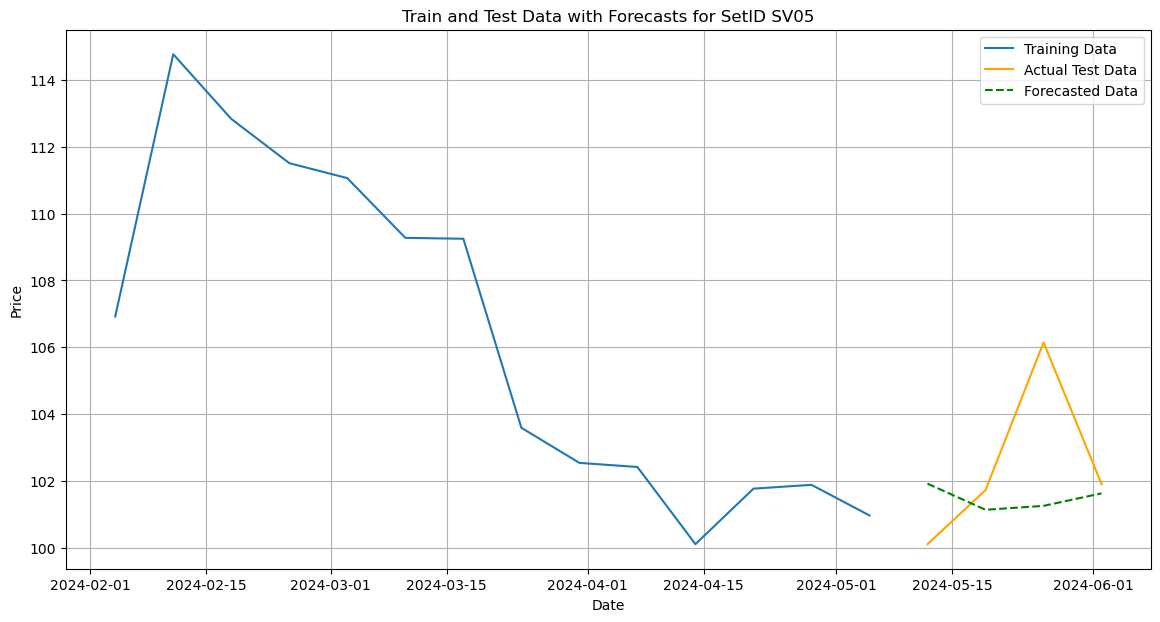

C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


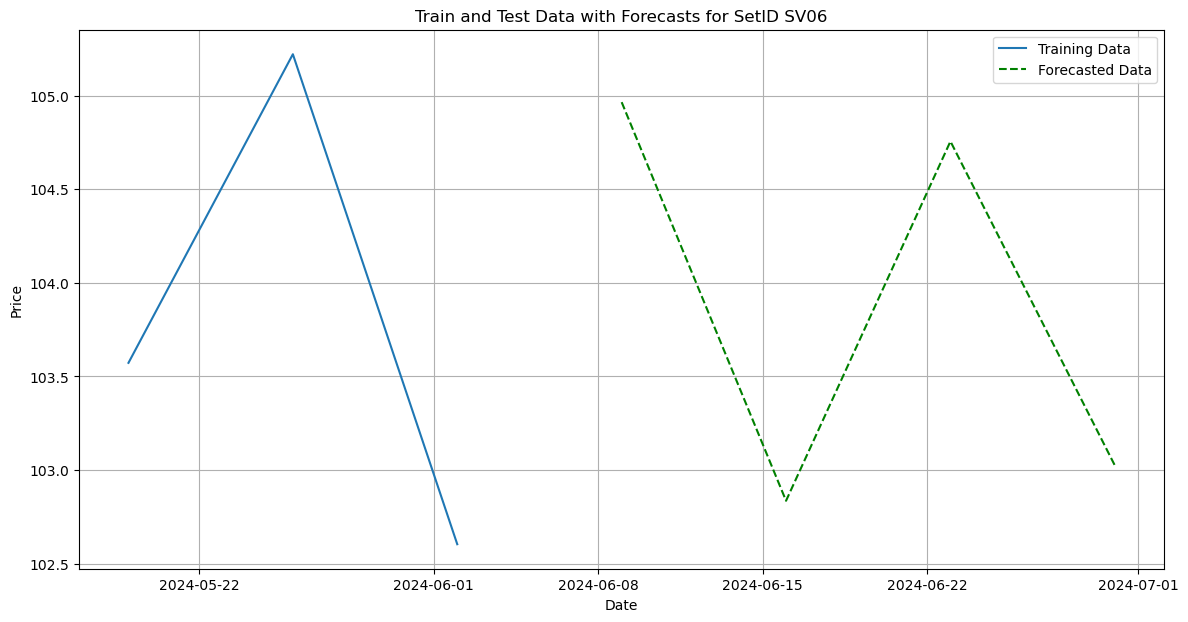

C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


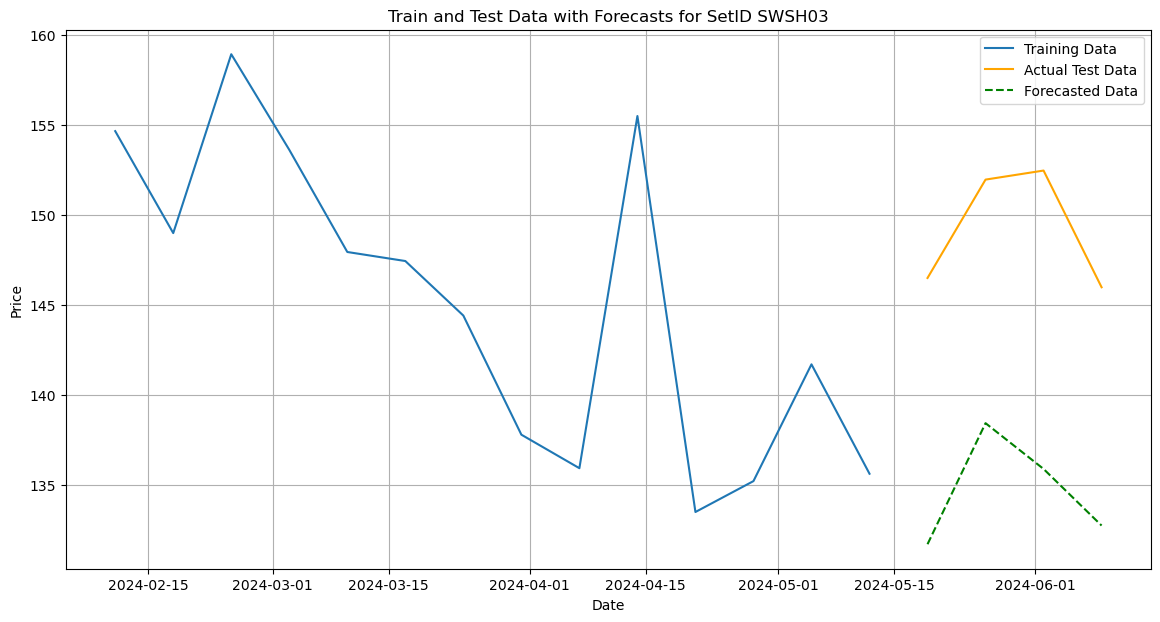

C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


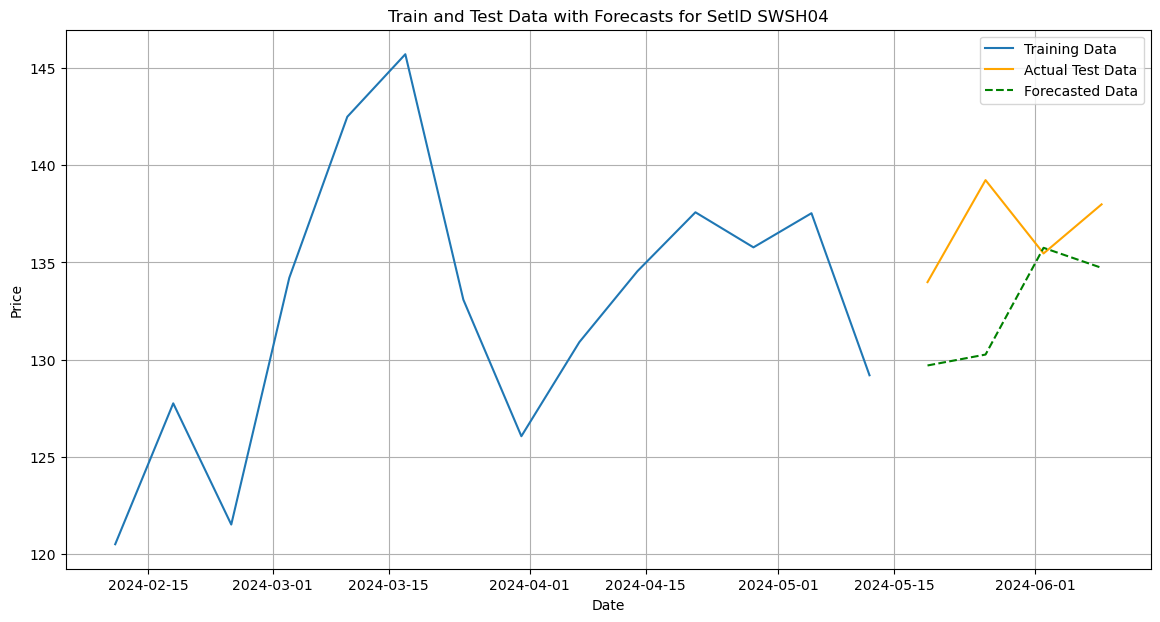

C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


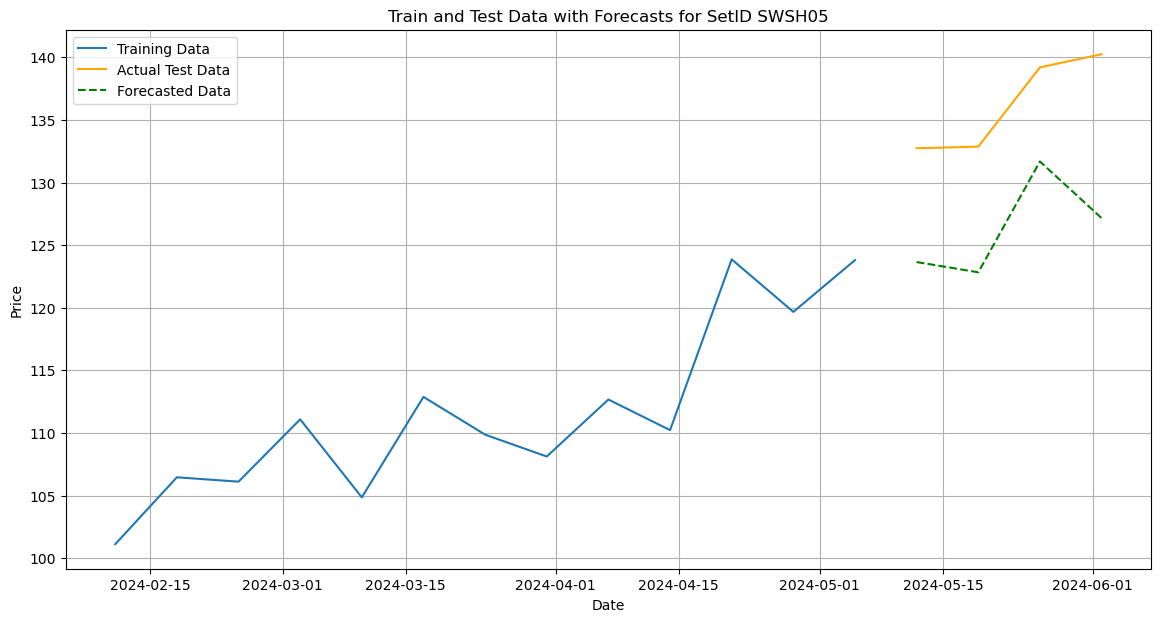

C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


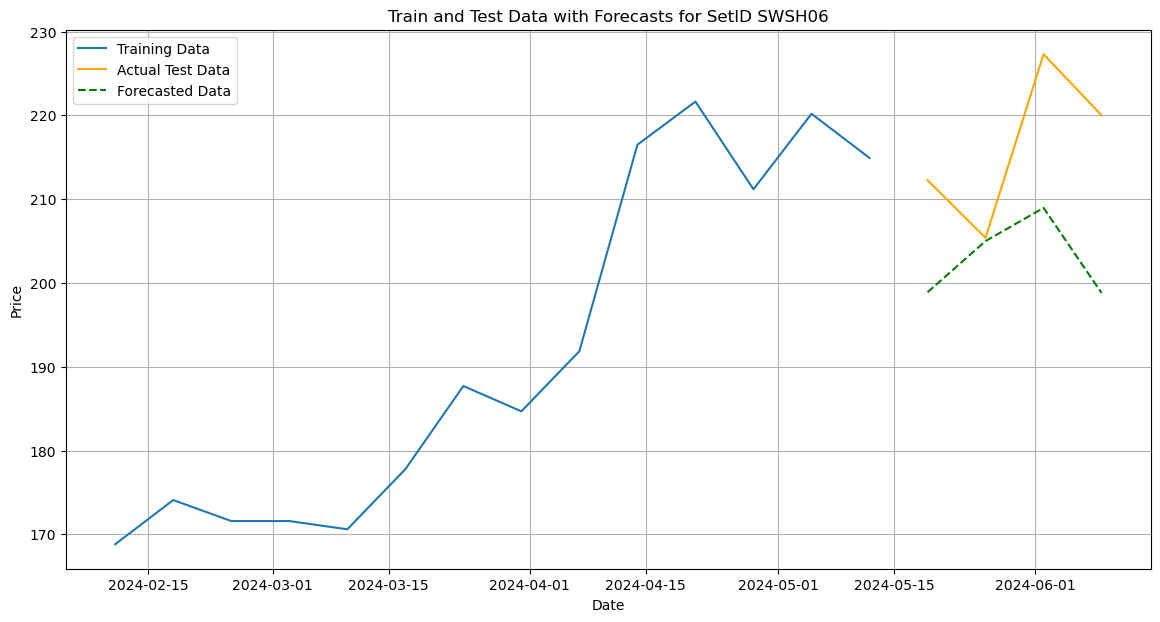

C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


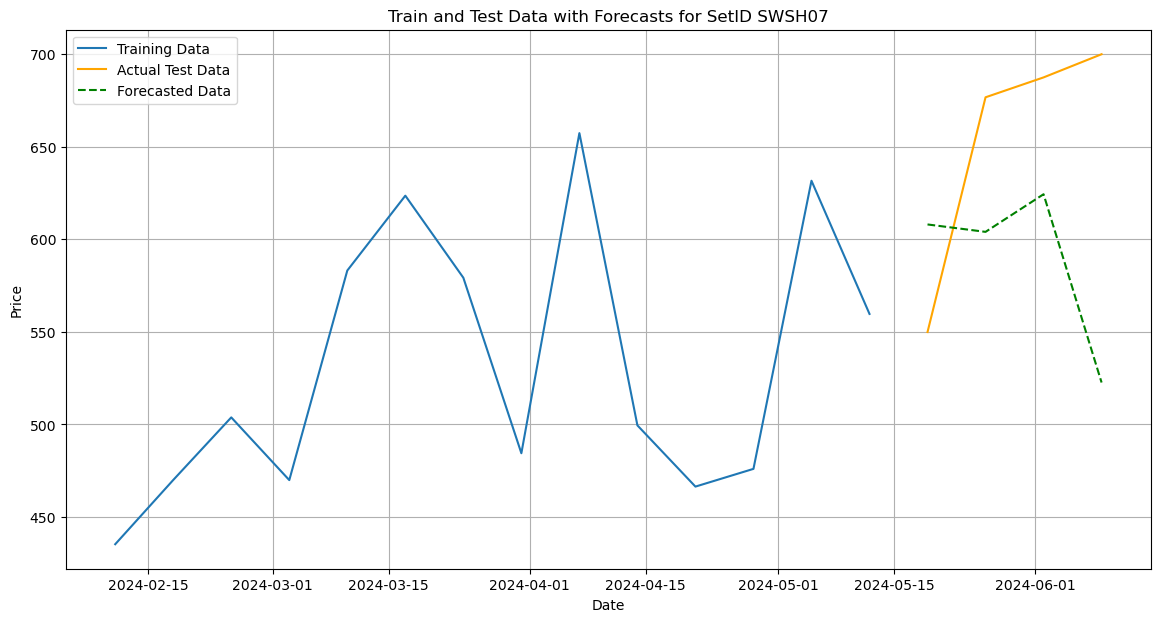

C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


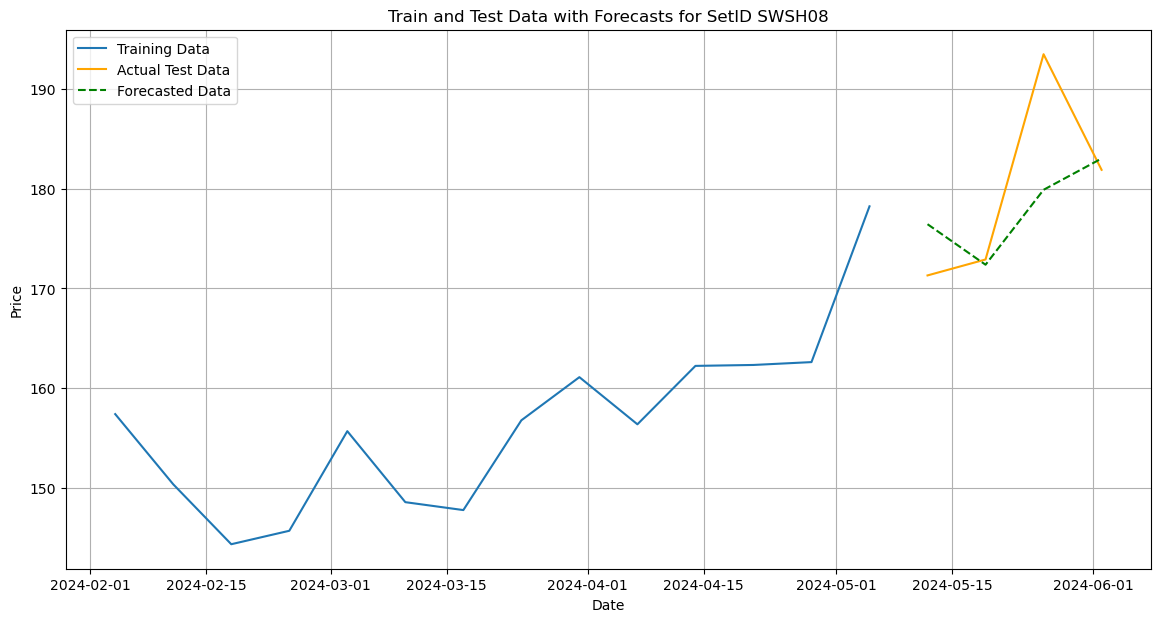

C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


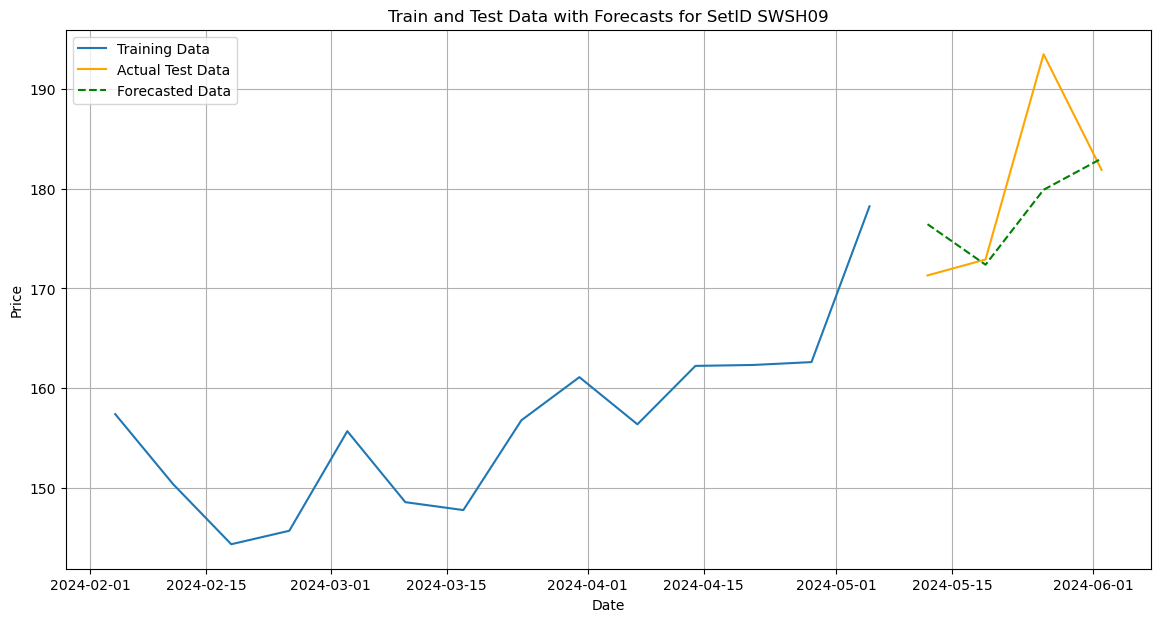

C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


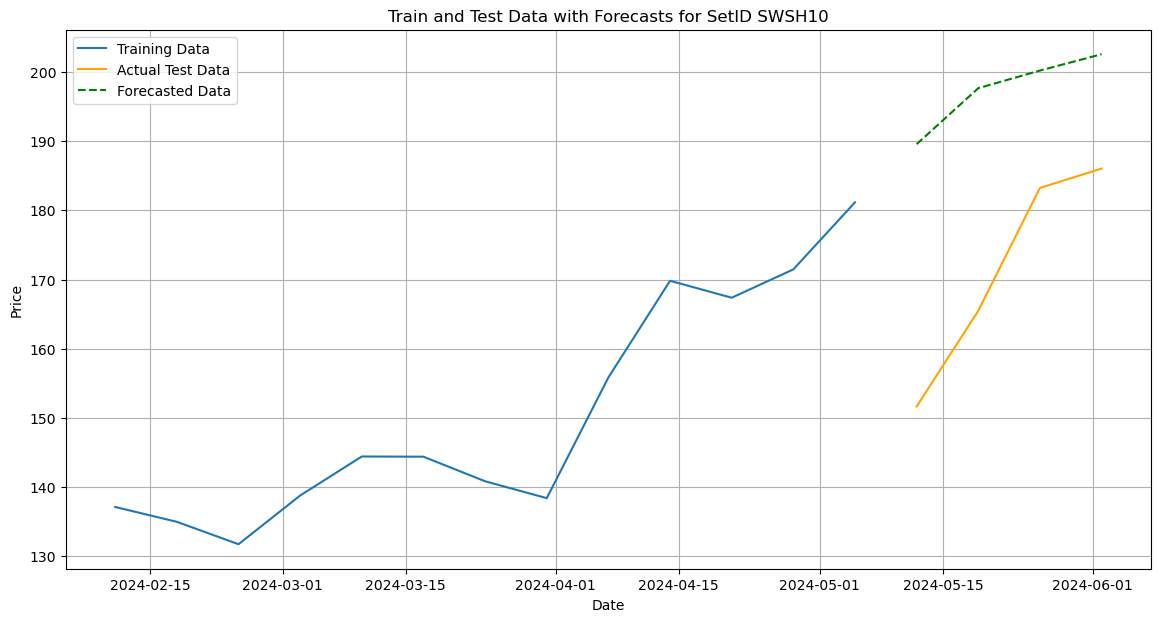

C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


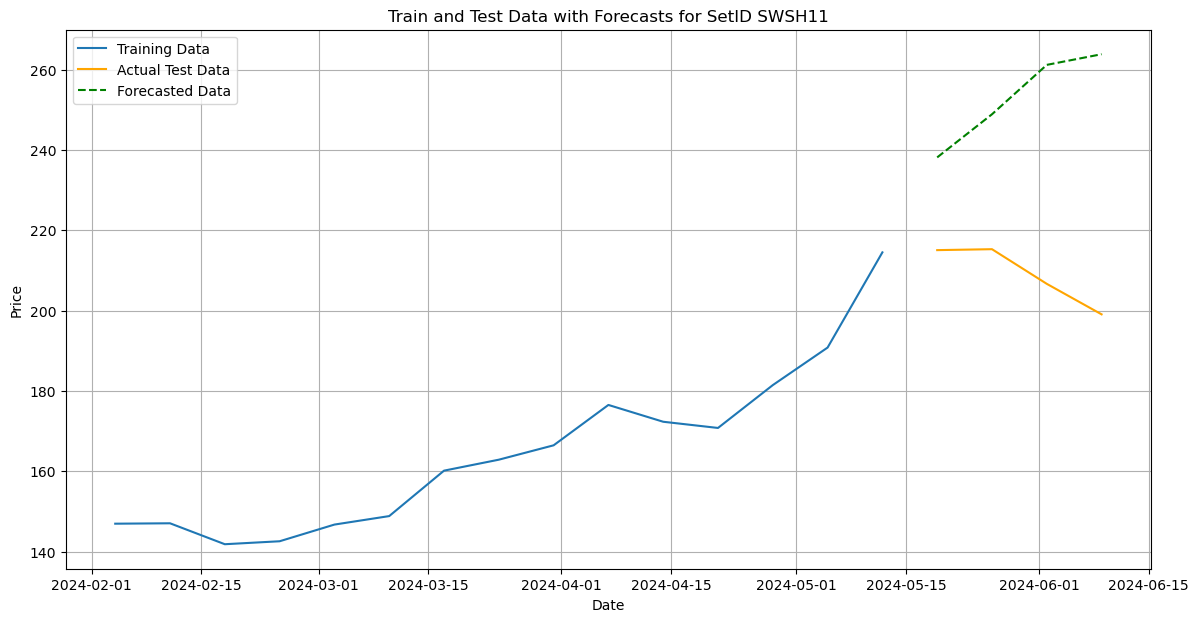

C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\ivan2\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


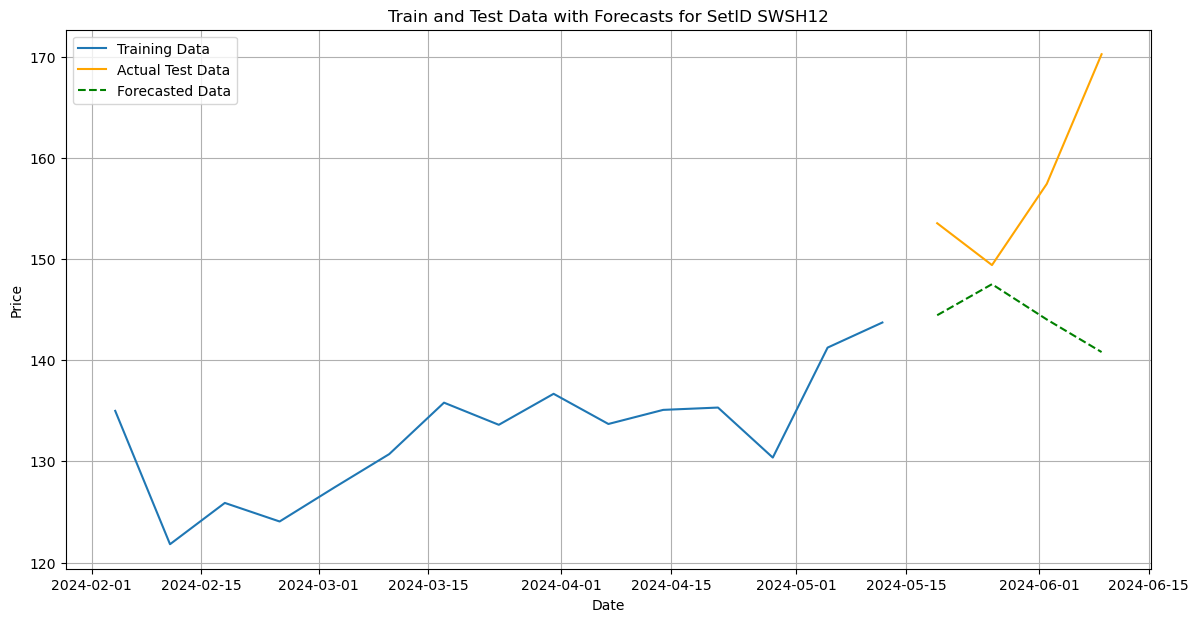

In [38]:
# Run the ARIMA model for each SetID
for set_id in weekly_df['SetID'].unique():
    set_train_data = train_df[train_df['SetID'] == set_id].set_index('Date')['Price']
    set_test_data = test_df[test_df['SetID'] == set_id].set_index('Date')['Price']
    
    set_train_data = set_train_data.sort_index()
    set_test_data = set_test_data.sort_index()
    
    if len(set_train_data) > 1:
        model = ARIMA(set_train_data, order=(5, 1, 0)) #adjusting the order
        model_fit = model.fit()
        
        forecast = model_fit.forecast(steps=4) #set forecast period
        forecast_dates = pd.date_range(start=set_train_data.index[-1], periods=5, freq='W')[1:] #set forecast periods
        
        if not set_test_data.empty:
            mae, mse, rmse = calculate_metrics(set_test_data, forecast[:len(set_test_data)])
            metrics_list.append({'SetID': set_id, 'MAE': mae, 'MSE': mse, 'RMSE': rmse})
        
        plot_forecasts(set_id, set_train_data, set_test_data, forecast, forecast_dates)
    else:
        print(f"Not enough data to fit the ARIMA model for SetID {set_id}")

metrics_df = pd.DataFrame(metrics_list)

In [39]:
# Remove duplicate rows from the metrics DataFrame
metrics_df = metrics_df.drop_duplicates()

# Display the performance metrics
print(metrics_df)

     SetID        MAE           MSE        RMSE
0     SV01   5.848522     43.843181    6.621418
1     SV02  11.650994    179.814872   13.409507
2     SV03   2.275925      6.449312    2.539550
3     SV04   1.097316      1.377361    1.173610
4     SV05   1.890904      6.904425    2.627627
5   SWSH03  14.516171    212.446070   14.575530
6   SWSH04   4.207762     27.461688    5.240390
7   SWSH05   9.931475    102.768677   10.137489
8   SWSH06  13.327010    241.235741   15.531766
9   SWSH07  92.824621  11026.196514  105.005698
10  SWSH08   5.105244     53.333573    7.302984
11  SWSH09   5.105244     53.333573    7.302984
12  SWSH10  25.895868    758.455165   27.540065
13  SWSH11  43.985720   2206.540531   46.973828
14  SWSH12  13.454583    283.090964   16.825307


Arima is a uni-variat model. For this model the variables were Date and Sale Price.
The next model will be either a Random Forrest or Multi-variat linear regression.

# Modeling Phase - Random Forest

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
# Function to manually split data into training and test sets ensuring sufficient data
def custom_train_test_split(data, test_size=0.2, min_train_size=10):
    train_data = []
    test_data = []
    
    for set_id in data['SetID'].unique():
        set_data = data[data['SetID'] == set_id]
        n = len(set_data)
        if n < min_train_size + int(test_size * n):
            # Use all data for training if not enough data for test set
            train_data.append(set_data)
        else:
            train_index = int(n * (1 - test_size))
            train_data.append(set_data.iloc[:train_index])
            test_data.append(set_data.iloc[train_index:])
    
    train_df = pd.concat(train_data)
    test_df = pd.concat(test_data) if test_data else pd.DataFrame(columns=data.columns)
    
    return train_df, test_df

In [42]:
# Prepare the data for modeling
# Dropping Date since DSR can also be used to calculate sale date
X = weekly_df.drop(['Price', 'Date'], axis=1)
y = weekly_df['Price']

In [43]:
# Concatenate X and y for the custom split function
data = pd.concat([X, y], axis=1)

# Apply the custom train-test split function
train_data, test_data = custom_train_test_split(data)

In [44]:
# Separate the features and target variable for train and test sets
# Drop SetID since it is an string and not an attribute variable
X_train = train_data.drop(['Price', 'SetID'], axis=1)
y_train = train_data['Price']
X_test = test_data.drop(['Price', 'SetID'], axis=1)
y_test = test_data['Price']

In [45]:
# Build and train the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2

(14.215798891880205, 948.2814905288359, 0.9464646779107809)

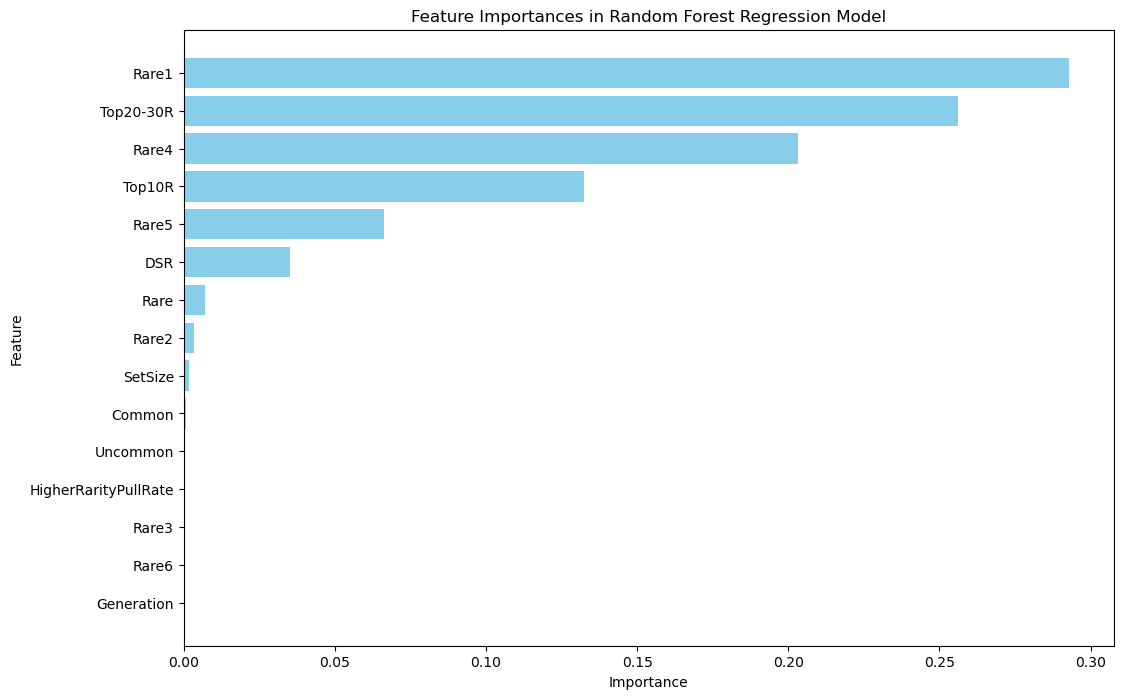

In [46]:
# Get feature importances
importances = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Regression Model')
plt.gca().invert_yaxis()
plt.show()

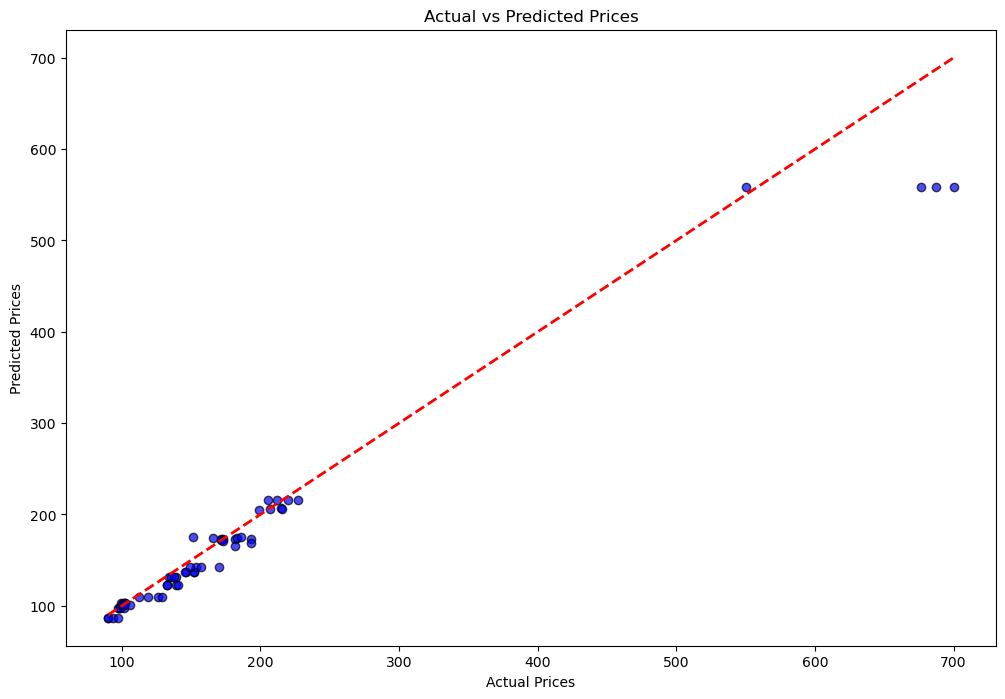

In [47]:
# Plotting predictions vs actual values
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

**Train the entire dataset and make predictions using inputs**

In [48]:
# Train the model on the entire dataset
model.fit(X_train, y_train)

# Define a function to predict the price based on new inputs
def predict_price(new_input):
    # Ensure the new input has the same structure as the training data
    input_df = pd.DataFrame([new_input], columns=X_train.columns)
    predicted_price = model.predict(input_df)
    return predicted_price[0]

# Example usage:
# new_input_example = {
#     'SetSize': 258, 'Common': 105, 'Uncommon': 60, 'Rare': 21, 
#     'Rare1': 12, 'Rare2': 20, 'Rare3': 24, 'Rare4': 10, 'Rare5': 6, 
#     'Rare6': 0, 'Top10R': 1, 'Top20-30R': 1, 'Generation': 12, 
#     'HigherRarityPullRate': 0.03, 'DSR': 428
# }
# predicted_price = predict_price(new_input_example)
# print(f'Predicted Price: {predicted_price}')

# Return the function for the user to use
def get_predict_price_function():
    return predict_price


In [49]:
# Define your new input as a dictionary
new_input_example = {
    'SetSize': 247, 'Common': 49, 'Uncommon': 78, 'Rare': 22, 
    'Rare1': 22, 'Rare2': 21, 'Rare3': 30, 'Rare4': 4, 'Rare5': 21, 
    'Rare6': 0, 'Top10R': 0, 'Top20-30R': 1, 'Generation': 11, 
    'HigherRarityPullRate': 0.01, 'DSR': 700
}

# Get the predicted price
predicted_price = predict_price(new_input_example)
print(f'Predicted Price: {predicted_price}')

Predicted Price: 204.66150782440963
